In [2]:
from funcs.notebook import *
df = pd.read_csv("../results/2020_02_obsdurs.csv")
hist = pd.DataFrame()

In [3]:
bins = np.linspace(0,1,1231)
bins

array([0.00000000e+00, 8.13008130e-04, 1.62601626e-03, ...,
       9.98373984e-01, 9.99186992e-01, 1.00000000e+00])

In [4]:
len(bins)

1231

In [355]:
for i, row in df.iterrows():
    lc = pd.read_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    hist[f"{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}"] = counts

In [356]:
hist.to_csv(f"../results/observedtimes/hist_1231_obst.csv")

(0.0, 1.0)

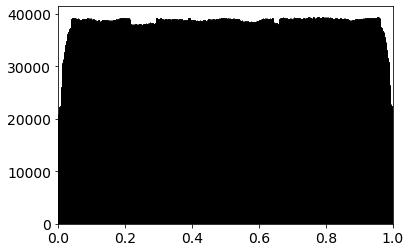

In [357]:
plt.bar((bins[:-1]+bins[1:]) / 2, hist.sum(axis=1).values, width = bins[1]-bins[0],facecolor="w", edgecolor="k")
plt.xlim(0,1)

In [358]:
flares = pd.read_csv("../results/2020_02_flares_vetted.csv")
flares["real?"] = flares["real?"].fillna(0).astype(float)
ff = flares[(flares["real?"]==1.)]
ff.shape

(1295, 19)

In [359]:
phases = []
for j, row in ff.iterrows():
    try:
        lc = pd.read_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv")
        phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
    except Exception as e:
        print(e)
        phases.append(np.nan)
 

[Errno 2] No such file or directory: '../results/observedtimes/TOI-700_27_0_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.csv'
[Errno 2] No such file or directory: '../results/observedtimes/2MASS J01225093-2439505_30_1_TESS.c

In [361]:
counts, bins = np.histogram(phases, bins=bins)
cumfreq = (counts / hist.sum(axis=1).values).cumsum()
lin = np.linspace(cumfreq[0],np.max(cumfreq),len(bins)-1)

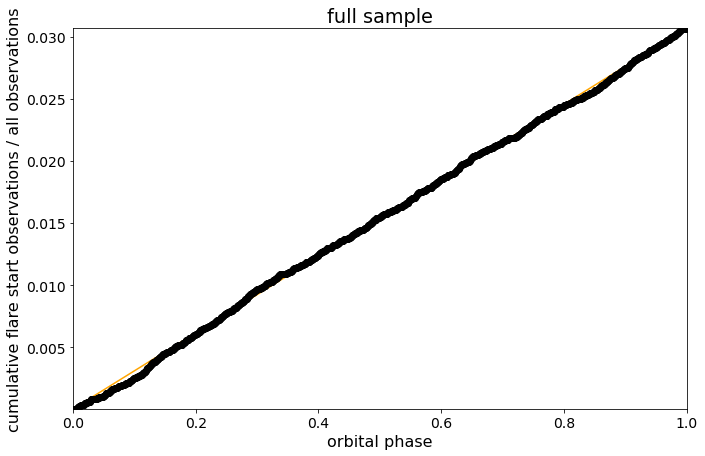

In [367]:
plt.figure(figsize=(11,7))
plt.errorbar((bins[:-1]+bins[1:]) / 2,
             cumfreq,#counts / hist.sum(axis=1).values, 
             #yerr = np.sqrt(counts) / hist.sum(axis=1).values,
             c='k',fmt="o")
plt.plot((bins[:-1]+bins[1:]) / 2, lin, c="orange")
plt.xlim(0,1)
plt.ylabel("cumulative flare start observations / all observations")
plt.xlabel("orbital phase")
plt.title("full sample")
plt.ylim(cumfreq[0],np.max(cumfreq))
plt.savefig("../results/plots/cumulative_flare_phases_full_sample.png", dpi=300)

In [372]:
f = pd.DataFrame({"freq":counts / hist.sum(axis=1).values, "phase":(bins[:-1]+bins[1:]) / 2})
h1 = hist.sum(axis=1).values[:615].sum()
h2 = hist.sum(axis=1).values[615:].sum()
phases = np.array(phases)
f1 = np.where((phases<.25) | (phases>.75))[0].shape[0] 
f2 = np.where((phases>.25) & (phases<.75))[0].shape[0]
e1, e2 = np.sqrt(f1)/h1, np.sqrt(f2)/h2
print(fr"{f1 / h1:.2e} +/- {e1:.2e}")
print(fr"{f2 / h1:.2e} +/- {e2:.2e}")

2.48e-05 +/- 1.03e-06
2.53e-05 +/- 1.03e-06


In [376]:
_ = f1 / h1 + e1
fr"{_:.2e}"

'2.59e-05'